# Lab 10 – Classification

Name: Jimmy Zhu
Class: CSCI 349 - Intro to Data Mining
Semester: Spring 2023
Instructor: Brian King

In [1749]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import plotly.io as pio

pio.renderers.default = "plotly_mimetype+notebook"

---
# Exercises

**1)** [P] Read about the famous Fisher's Iris dataset. This is perhaps the most commonly used dataset to teach
students how to build classification models: https://en.wikipedia.org/wiki/Iris_flower_data_set :

Then, include the following code to import a copy of the Iris data from Seaborn's library of datasets:
df_iris = sns.load_dataset('iris')

Print out the results of info() to understand the types of each variable as read in from the csv file.

In [1750]:
df_iris = sns.load_dataset('iris')
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**2)** [P] Be thankful for a moment, because the data are clean. However, the species variable needs work.
Convert the variable to a pandas Categorical variable. Then show the distribution of your variable (how
many of each species?). Repeat the info() output to show that your variable is now categorical, and not
merely an object.

In [1751]:
df_iris["species"] = df_iris["species"].astype("category")
df_iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [1752]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


**3)** [P] Now, perform essential summarizing tasks on your data. Show the output of describe() and show the first 10 observations.

In [1753]:
df_iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [1754]:
df_iris.head(10)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa

---
# More visual EDA and plotting

**4)** [P] Always start with basic univariate plots. Create a single boxplot showing the distribution of each of the four independent variables on one plot, using a boxplot. Ignore the target variable species for the time.

In [1755]:
# Note: I actually did this problem myself using the same method, but I did not melt the dataframe. I think it is simply a better practice to melt the dataframe, so I just changed my code to the example code.

df_iris_melt = pd.melt(df_iris, id_vars="species")
fig = px.box(df_iris_melt,
             x='variable',
             y='value',
             title="Fisher's Iris Data")
fig.update_yaxes(title="cm")
fig.update_layout(width=550, height=500)
fig.show()

---
# "Melting" your data into a long format

**5)** [M/P] Violin plots are becoming increasingly common in data science. First, briefly explain what a violin plot is.
Then, figure out how to generate a univariate violin plot of each independent variable. Compare and contrast
your violin plot against the boxplot. (NOTE: Seaborn makes this very easy!)

A violin plot has a similar structure as a box plot to show the distribution of the variables. Aside from doing all the things that a box plot does (showing the medium, IQR, etc.), it also vertically displays the shape of the distribution.

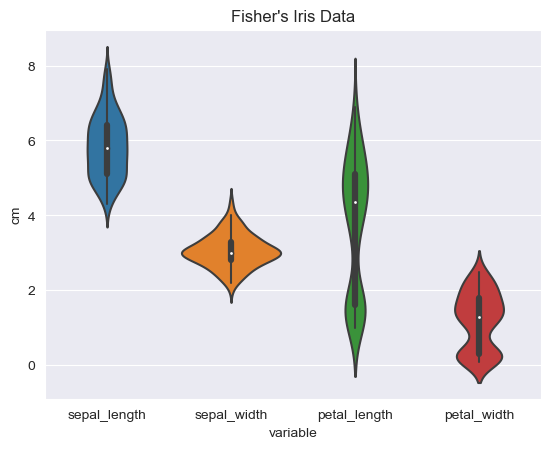

In [1756]:
sns.violinplot(data=df_iris)
plt.title("Fisher's Iris Data")
plt.ylabel("cm")
plt.xlabel("variable")
plt.show()

Comparing the two plots that I made earlier, I think violin plot is definitely a more versatile plot, with the shapes of variables also displayed. However, I find it harder to know how many outliers specifically with the violin plot. Box plot typically marks the outliers as dots.

**6)** [P] Show a histogram and/or a density plot of each variable on a single plot. And be sure to provide some way
to see the distribution of all four variables separately. You could use alpha blending on the histogram, or
perhaps consider a "rugplot" overlaid on top.

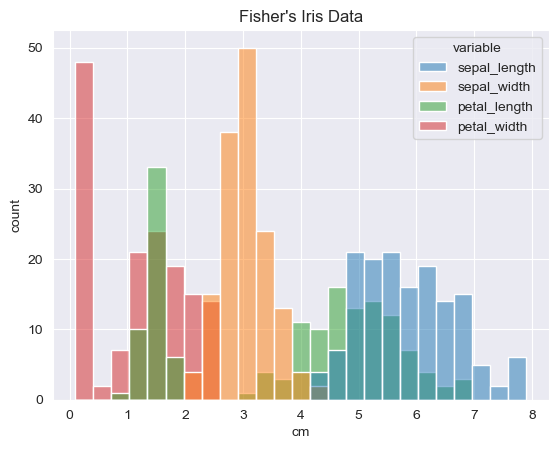

In [1757]:
sns.histplot(data=df_iris_melt,
             x='value',
             hue='variable',
             bins=25)
plt.title("Fisher's Iris Data")
plt.xlabel("cm")
plt.ylabel("count")
plt.show()

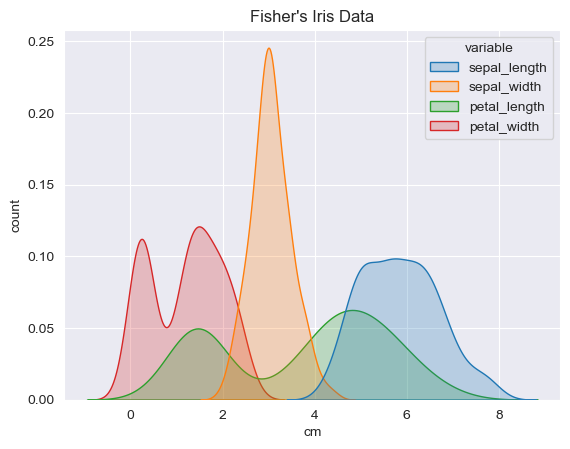

In [1758]:
sns.kdeplot(data=df_iris_melt,
            x='value',
            hue='variable',
            fill=True)
plt.title("Fisher's Iris Data")
plt.xlabel("cm")
plt.ylabel("count")
plt.show()

**7)** [M] Summarize your findings from these plots. Is one most ideal for understanding your distribution?
Characterize the distribution of your four variables. Remember, this is a univariate exploration, so you don't care about the class variable yet.

I think I prefer violin plot for summarizing and understanding my distribution just because it is clear, plot different variables separately, and also presents the shape.

The sepal length and sepal width both have normal distributions. Sepal length has a median at 5.8 and sepal width has a median at 3. The sepal width has a smaller IQR because the data are very concentrated near the median, while the Sepal length is not concentrated. While the sepal width is more concentrated, it has some outliers. The Petal length and petal width both are bimodal distributions. Petal length has a median at 4.35 and petal width has a median at 1.3. Petal length has a large IQR.

**8)** [P] Use the pandas interface to generate a quick boxplot (df_iris.boxplot()!) However, look up how to create a faceted boxplot with each variable listed in a separate plot, automatically showing the distributions of your variables by "species".

C:\Users\jimmyz\AppData\Local\Temp\ipykernel_15668\3316898484.py:4: UserWarning:

When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.



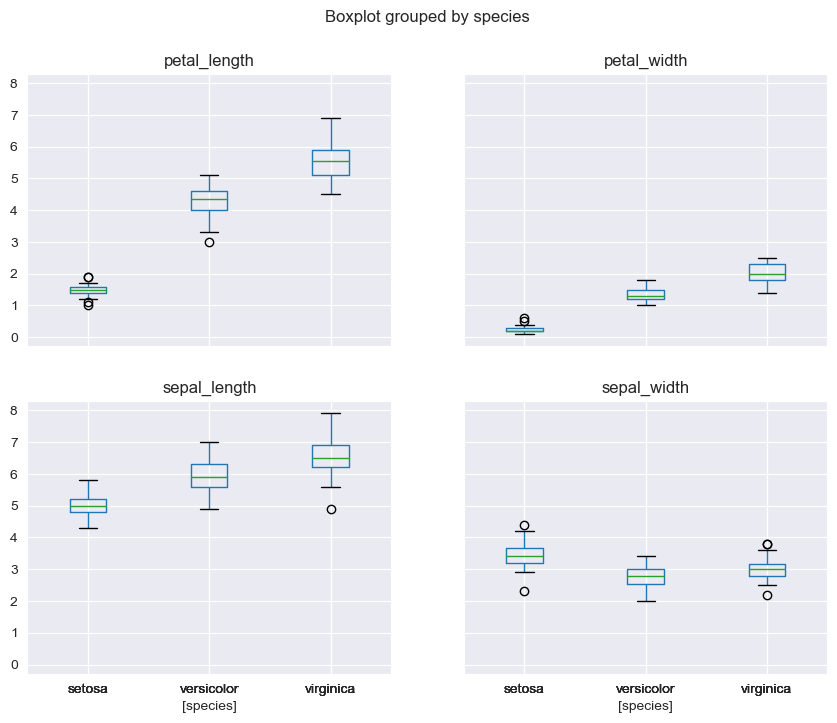

In [1759]:
# ChatGPT

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8), sharex=True, sharey=True)
df_iris.boxplot(by='species', ax=axes)

# remove the x-axis label from the subplots in the first row
for ax in axes[0]:
    ax.set_xlabel('')

plt.show()

**9)** [P] Use either seaborn or plotly to generate a boxplot over each variable, but now showing the three different species as distinct boxplots.

In [1760]:
fig = px.box(df_iris_melt,
             x='variable',
             y='value',
             color='species',
             title="Fisher's Iris Data")
fig.update_yaxes(title="cm")
fig.update_layout(width=550, height=500)
fig.show()

**10)** [P] Generate a violin plot over all variables much like the previous boxplot, but again, be sure to indicate the species as a distinct color.

In [1761]:
fig = px.violin(df_iris_melt,
                x='variable',
                y='value',
                color='species',
                title="Fisher's Iris Data")
fig.update_yaxes(title="cm")
fig.update_layout(width=550, height=500)
fig.show()

**11)** [P] Read about the scatter_matrix() function in pandas. Use it to generate a scatterplot matrix, and use species for the color.

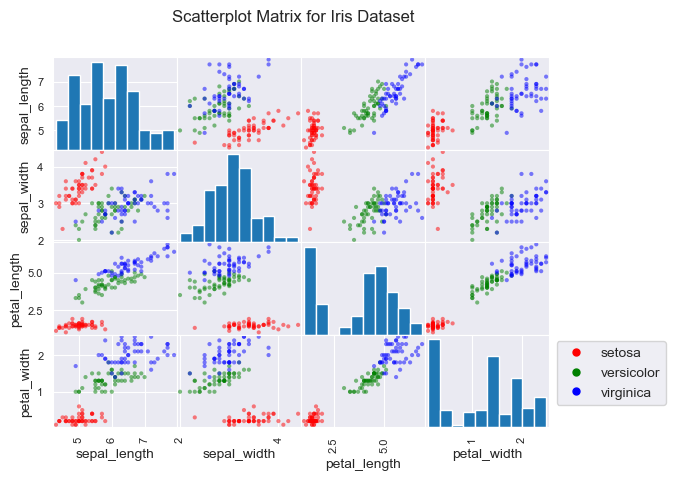

In [1762]:
# ChatGPT
# Create color map based on species codes
color_map = np.array(['red', 'green', 'blue'])
colors = color_map[df_iris["species"].cat.codes]

pd.plotting.scatter_matrix(df_iris, color=colors)
plt.suptitle("Scatterplot Matrix for Iris Dataset")

# Create legend
handles = [plt.plot([],[],
                    color=color_map[i],
                    ls="",
                    marker=".",
                    markersize=10)[0] for i in range(3)]
labels = df_iris.species.unique()

plt.legend(handles,
           labels,
           bbox_to_anchor=(2, 1),
           loc='upper right',
           frameon=True)

plt.show()

**12)** [P] Read about the seaborn pairplot() function, then use it to generate one of the most useful scatterplots matrices you'll see with this data. (It won't be too different than the scatter_matrix function, just easier to create, and the diagonal density plots are much better.) Take a moment to study the plot, and really try to understand just how much information this plot is conveying. Be sure to figure out how to distinguish the species by color.

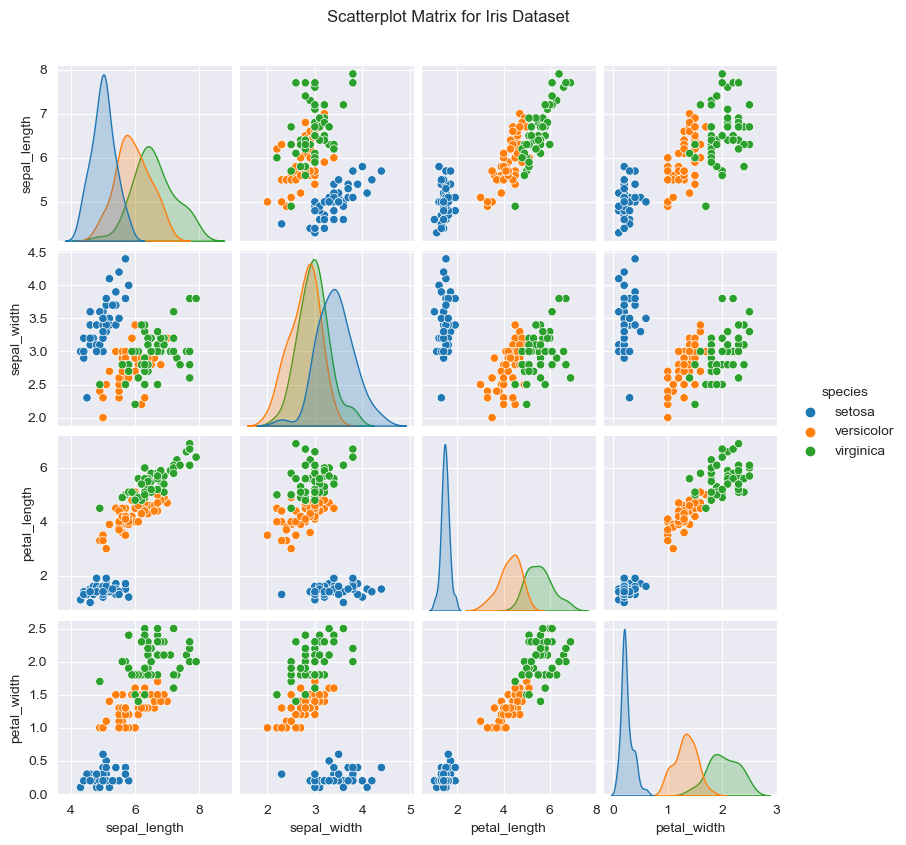

In [1763]:
sns.pairplot(df_iris, hue='species', height=2, aspect=1)
plt.suptitle("Scatterplot Matrix for Iris Dataset", y=1.05)
plt.show()

**13)** [M] From your observations, which species do you expect to have the best classifier performance? Why?

Setosa, since in all plots setosa tends to cluster itself and isolate itself from the other two species.

---
# Preparing our data for modeling

**14)** [P] Split your data frame into X and y, where X is a data frame with only your four predictor variables, and y represents only the target class, species. Output the names of the columns and the shape of both just to confirm that they both have the same number of observations, and that the number of variables in each are correct. You should have (150, 4), and (150, 1) respectively.

In [1764]:
X = df_iris.loc[:, "sepal_length":"petal_width"]
y = df_iris.loc[:, "species":"species"]

In [1765]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [1766]:
y.columns

Index(['species'], dtype='object')

In [1767]:
X.shape

(150, 4)

In [1768]:
y.shape

(150, 1)

---
# Building our classifier

**15)** [P] Create an instance of a decision tree classifier using DecisionTreeCassifier() with default parameters. Name the classifier clf. Train the classifier with the entire dataset (i.e. all of X and y.) Show the classifier after training by simply include print(clf)so you can see the default parameters used to build the classifier

In [1769]:
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)
print(clf)

DecisionTreeClassifier()


**16)** [P] Remember that one of the most popular reasons for using decision trees is because the model is easily visualized for model interpretation purposes. Use the plot_tree method to plot the tree. Explore the arguments to be sure that nodes are shaded by target class. Feature and class names should be shown. You should notice that the class you expected to perform well due to a clear decision boundary noted in your EDA above is indeed perfectly classified with only one node off the root node.

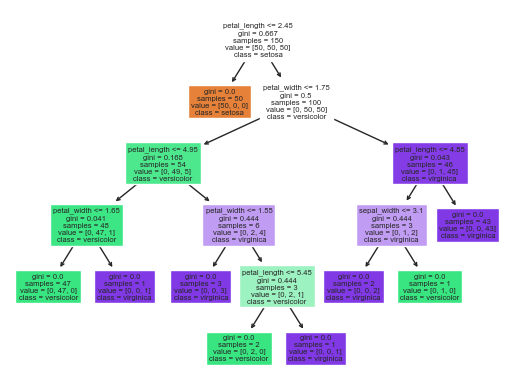

In [1770]:
plot_tree(clf,
          filled=True,
          feature_names=X.columns,
          class_names=y.species.cat.categories)
plt.show()

**17)** [P] - Use this model to predict back your training data to evaluate your model. Name your predictions y_pred. Then, report the accuracy using the score method on the classifier.

In [1771]:
y_pred = clf.predict(X)
clf.score(X, y)

1.0

**18)** [M] You should see 100% accuracy. Why are you getting a perfect score?

Because I am using the training data as the testing data. I trained using the training data and thus when testing using the same data it should have a perfect score.

**19)** [P] Let's simplify our tree structure. Create a new tree, but adjust the pruning / complexity parameters. How? We'll keep this simple. Ensure that every leaf in the tree contains at least 5 samples. Show the tree that you induced, and again store your predictions as y_pred. Then, show the accuracy. (It should be 97.3%)

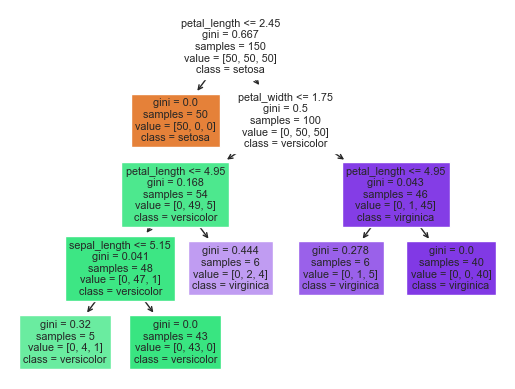

In [1772]:
clf = DecisionTreeClassifier(min_samples_leaf=5)
clf = clf.fit(X, y)
plot_tree(clf,
          filled=True,
          feature_names=X.columns,
          class_names=y.species.cat.categories)
plt.show()

In [1773]:
y_pred = clf.predict(X)
clf.score(X, y)

0.9733333333333334

**20)** [M/P] OK – clearly we have lower accuracy. Dive deeper. Accuracy is usually not a good measure of classifier performance. (This is certainly true for imbalanced data, though not as problematic for these data because each class has equal representation.) Look up the function classification_report. This outputs a lot of performance information!

(You are strongly encouraged (not required) to delve into understanding what the micro, macro, and weighted average readings mean. Take notes in this section if you are inclined to do so. This function will do a LOT for you!)

Which class had the lowest precision? Which had the lowest recall?

ChatGPT:

Micro Average: It is the average of data points at an individual level. For example, the average score of a single student in a class of 30 students.

Macro Average: It is the average of data points at a group or population level. For example, the average score of all students in a class of 30 students.

Weighted Average: It is an average in which each data point is given a weight or importance based on some predetermined criteria. For example, the average grade of a student in a class where the final exam is worth 50% of the grade, the mid-term exam is worth 30%, and the assignments are worth 20%.

In [1774]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.94      0.96        50
   virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



Virginica has the lowest precision, versicolor has the lowest recall

**21)** [P] Output a confusion matrix using the confusion_matrix method in sklearn.metrics. Your result should look like a square matrix, where rows are the true labels, and the columns are the predicted labels, and the diagonal represents the cases where the true label and predicted label match.

In [1775]:
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

**22)** [P] Even better! Use the plot_confusion_matrix to output an excellent visual summary of the classifier performance.

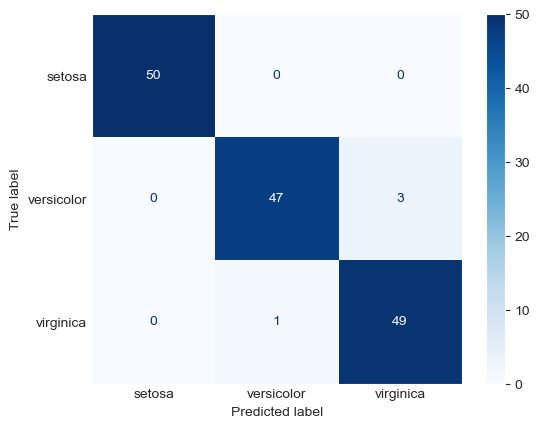

In [1776]:
disp = ConfusionMatrixDisplay(confusion_matrix(y, y_pred),
                              display_labels=["setosa", "versicolor", "virginica"])
disp = disp.plot(include_values=True, ax=None, cmap=plt.cm.Blues)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(visible=None)
plt.show()

**23)** [M] Interpret your confusion matrix and classification report. Which class is performing the best? Which is performing the worst? How many total incorrect predictions?

Looking at the classification report, we can safely say that setosa performs the best. It has 100% precision and 100% recall. This means that all the predictions are correct. Looking at the confusion matrix, we can also see that 50 samples of setosa reside at the setosal grid for true label and predicted label. This is all the setosa predictions, which means no prediction was made wrong when the true label is setosa. The other two all made some wrong predictions. Versicolor seems to be performing the worst, with 3 wrong predictions thinking that it is virginica, but with the same f1 scores, we cannot really say that one is worse than the other. There are 4 incorrect predictions in total.

---

# Evaluation vs. Validation

**24)** You need to create a train / test split of your data to properly validate your model. Read about the function in the scikit-learn user guide called train_test_split. in the package sklearn.model_selection. Then, use it to split your data into an 70% / 30% split of training and testing data, respectively. You should end up with four data frames, denoted X_train, X_test, Y_train, Y_test. Use an initial random seed of 0. Be sure to shuffle the data (verify that this is a default setting.) Show the dimensions of each of these (i.e. how many entries in each?)

In [1777]:
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, y,
                     test_size=0.3,
                     random_state=0,
                     shuffle=True)

In [1778]:
X_train.shape

(105, 4)

In [1779]:
X_test.shape

(45, 4)

In [1780]:
Y_train.shape

(105, 1)

In [1781]:
Y_test.shape

(45, 1)

**25)** Create a new instance of DecisionTreeClassifier with an initial random seed value of 100, and a minimum number of samples in a leaf set to 5. Store the classifier as clf. Train your classifier with your training data.

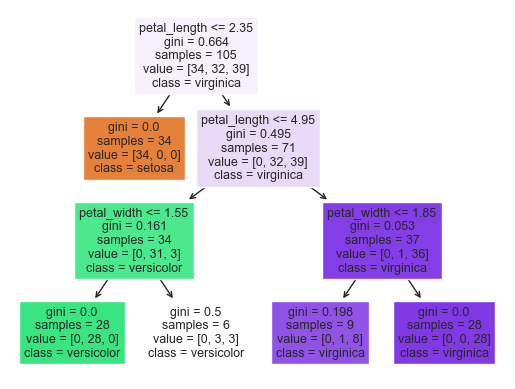

In [1782]:
clf = DecisionTreeClassifier(min_samples_leaf=5, random_state=100)
clf = clf.fit(X_train, Y_train)
plot_tree(clf,
          filled=True,
          feature_names=X.columns,
          class_names=y.species.cat.categories)
plt.show()

**26)** Use this model to predict the labels on your training data and your test data. Call your predictions y_pred_train. and y_pred_test. Show the accuracy of your classifier on both your training data and test data.

In [1783]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [1784]:
clf.score(X_train, Y_train)

0.9619047619047619

In [1785]:
clf.score(X_test, Y_test)

0.9111111111111111

**27)** [P/M] Use the classification report and confusion matrix techniques discussed above to assess the performance of your classifier on both the training and the test data (i.e. do evaluation and validation of your model!) Summarize your findings.

In [1786]:
print(classification_report(Y_train, y_pred_train))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       0.91      0.97      0.94        32
   virginica       0.97      0.92      0.95        39

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



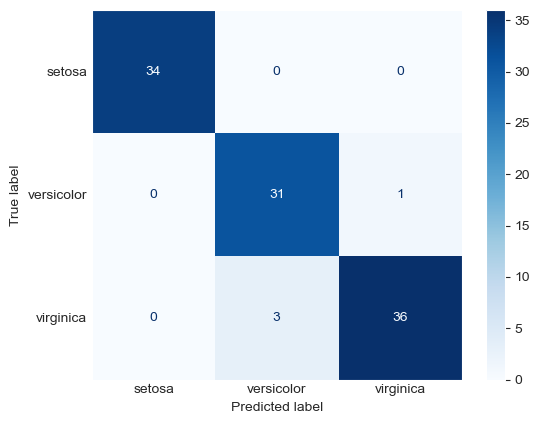

In [1787]:
disp = ConfusionMatrixDisplay(confusion_matrix(Y_train, y_pred_train),
                              display_labels=["setosa", "versicolor", "virginica"])
disp = disp.plot(include_values=True, ax=None, cmap=plt.cm.Blues)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(visible=None)
plt.show()

In [1788]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.85      0.94      0.89        18
   virginica       0.89      0.73      0.80        11

    accuracy                           0.91        45
   macro avg       0.91      0.89      0.90        45
weighted avg       0.91      0.91      0.91        45



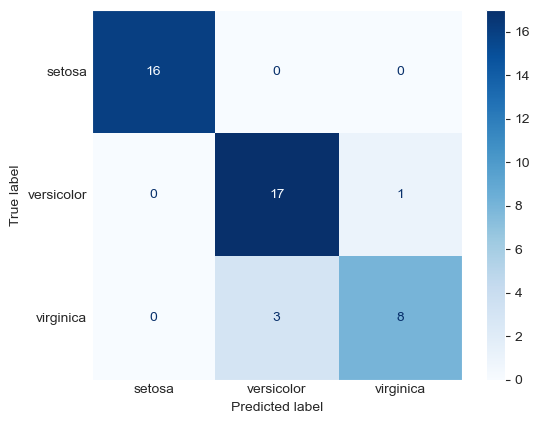

In [1789]:
disp = ConfusionMatrixDisplay(confusion_matrix(Y_test, y_pred_test),
                              display_labels=["setosa", "versicolor", "virginica"])
disp = disp.plot(include_values=True, ax=None, cmap=plt.cm.Blues)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(visible=None)
plt.show()

I find that the testing data has a lower accuracy than the training data, which is expected. The setosa's accuracy is not changed, since it has a more unique set of features than the other two variables. The f1 scores of the other two variables become lower when we are doing validation compared to evaluation. We can also see this in the confusion matrix. The evaluation matrix shows the same number of errors in verisicolor and virginica as the validation matrix, but the testing set has smaller number of data, this makes it less accurate.

**28)** [P] Quite often, when we have misclassifications, it's important to take the time to dig into your test data to determine which observations are being misclassified. Use data selection techniques to output the data that are being misclassified in the test data only.

In [1790]:
test = pd.concat([X_test, Y_test], axis=1)
test[Y_test.species != y_pred_test]

sepal_length  sepal_width  petal_length  petal_width     species
121           5.6          2.8           4.9          2.0   virginica
126           6.2          2.8           4.8          1.8   virginica
127           6.1          3.0           4.9          1.8   virginica
83            6.0          2.7           5.1          1.6  versicolor

**29)** [P] It's even more interesting when you can visualize where in your feature space your classifier might be missing something. Create a scatterplot matrix, but this time, highlight the instance(s) that are being misclassified.

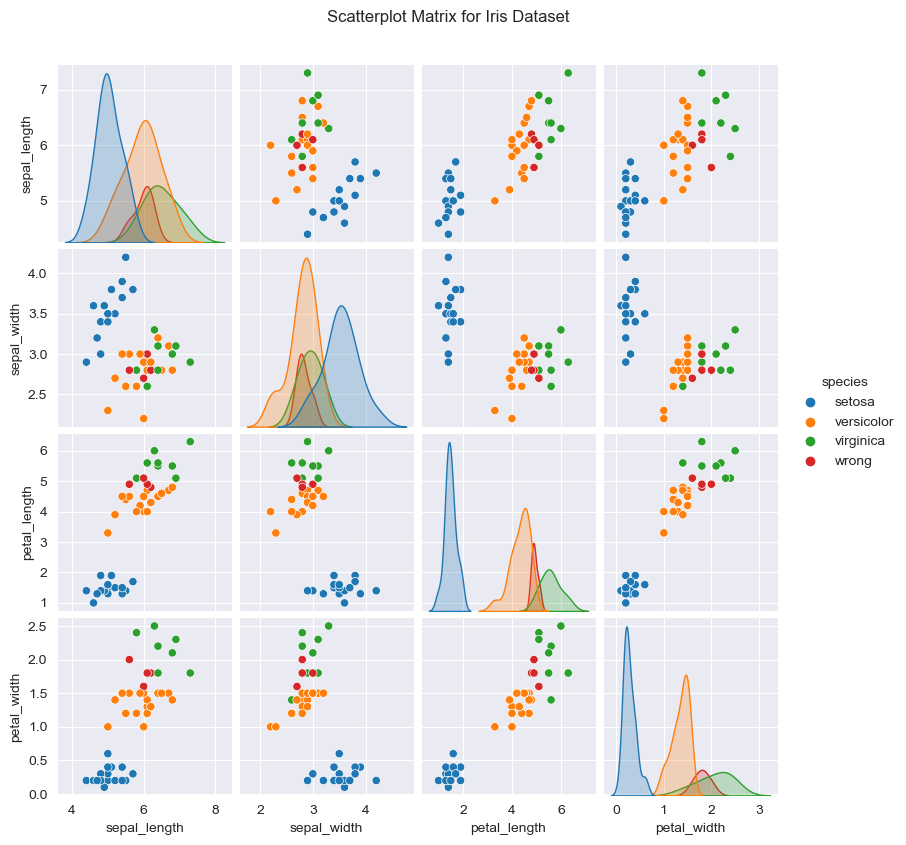

In [1791]:
test["species"] = \
    test["species"].cat.set_categories(["setosa", "versicolor", "virginica", "wrong"])
test.loc[test[Y_test.species != y_pred_test].index, "species"] = "wrong"

sns.pairplot(test, hue='species', height=2, aspect=1)
plt.suptitle("Scatterplot Matrix for Iris Dataset", y=1.05)
plt.show()

---

# K-fold Cross Validation

**30)** [M/P] Read about the KFold class. State what a KFold cross validation object will do for you. Then, create an instance of KFold with 10 splits, an initial seed of 100, and be sure to shuffle your data. Call your instance kfold.

From https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).
Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

In [1792]:
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

**31)** [P] Read about the split() method for KFold. It will help you iterate through each fold of your data. Take the time to understand how it works! If you set this up right, you will have a loop that will let you easily select train and test data for each fold. Once you do that, then you are merely repeating what you did already for the 70/30 split data above! For each fold, you fit a new model on the training data for that fold, then validate the model on the test data for the same fold. After 10 folds, you will have validated your model using your entire dataset as validation data!

Inside your loop, you should NOT print out your classification results. (However, sometimes it's useful to use Python timing functions to collect timing on different model building tasks, and that would be done inside the loop, placing a time stamp before and after the call to fit().) Only store the results of predicting on the test fold. I would accumulate my true class label and my predictions in a separate data frame, called df_results.

If you do this right, you will have a new data frame with a variable, such as "dt_def", or "dt_default", representing the prediction from the default decision tree classifier.

In [1793]:
# ChatGPT

df_results = pd.DataFrame(columns=["dt_def"], index=X.index)

for i, (train_index, test_index) in enumerate(kfold.split(X)):
    # split the data into training and testing sets
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index, :], y.iloc[test_index, :]

    # initialize the decision tree classifier
    dtc = DecisionTreeClassifier()

    # train the decision tree classifier on the training data
    dtc.fit(X_train, y_train)

    # predict the data
    y_pred = dtc.predict(X_test)

    # convert y_pred into a dataframe
    y_pred = pd.DataFrame(data=y_pred, index=X_test.index, columns=["dt_def"])

    # add the prediction to df_results
    df_results.update(y_pred)

df_results.head(10)

dt_def
0  setosa
1  setosa
2  setosa
3  setosa
4  setosa
5  setosa
6  setosa
7  setosa
8  setosa
9  setosa

**32)** [P] Print out a classification report from your 10 fold cross validation. Also print out your confusion matrix.
NOTE: You won't be able to use the plot_confusion_matrix method here, but you should be able to use the confusion_matrix method and seaborn's heatmap method.

In [1794]:
print(classification_report(y, df_results))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.94      0.94        50
   virginica       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



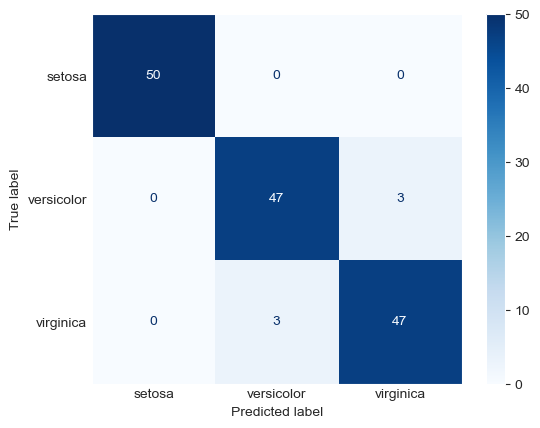

In [1795]:
disp = ConfusionMatrixDisplay(confusion_matrix(y, df_results),
                              display_labels=["setosa", "versicolor", "virginica"])
disp = disp.plot(include_values=True, ax=None, cmap=plt.cm.Blues)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(visible=None)
plt.show()

**33)** [P] Select and generate a report all of your test instances that were misclassified from the 10 fold cross validation. Also, generate a scatterplot that highlights the location of the instances that were misclassified.

In [1796]:
misclassified = df_iris[y.species != df_results.dt_def]
misclassified

sepal_length  sepal_width  petal_length  petal_width     species
70            5.9          3.2           4.8          1.8  versicolor
77            6.7          3.0           5.0          1.7  versicolor
83            6.0          2.7           5.1          1.6  versicolor
106           4.9          2.5           4.5          1.7   virginica
119           6.0          2.2           5.0          1.5   virginica
129           7.2          3.0           5.8          1.6   virginica

In [1797]:
print(classification_report(y[y.species != df_results.dt_def],
                            df_results[y.species != df_results.dt_def]))

              precision    recall  f1-score   support

  versicolor       0.00      0.00      0.00       3.0
   virginica       0.00      0.00      0.00       3.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0



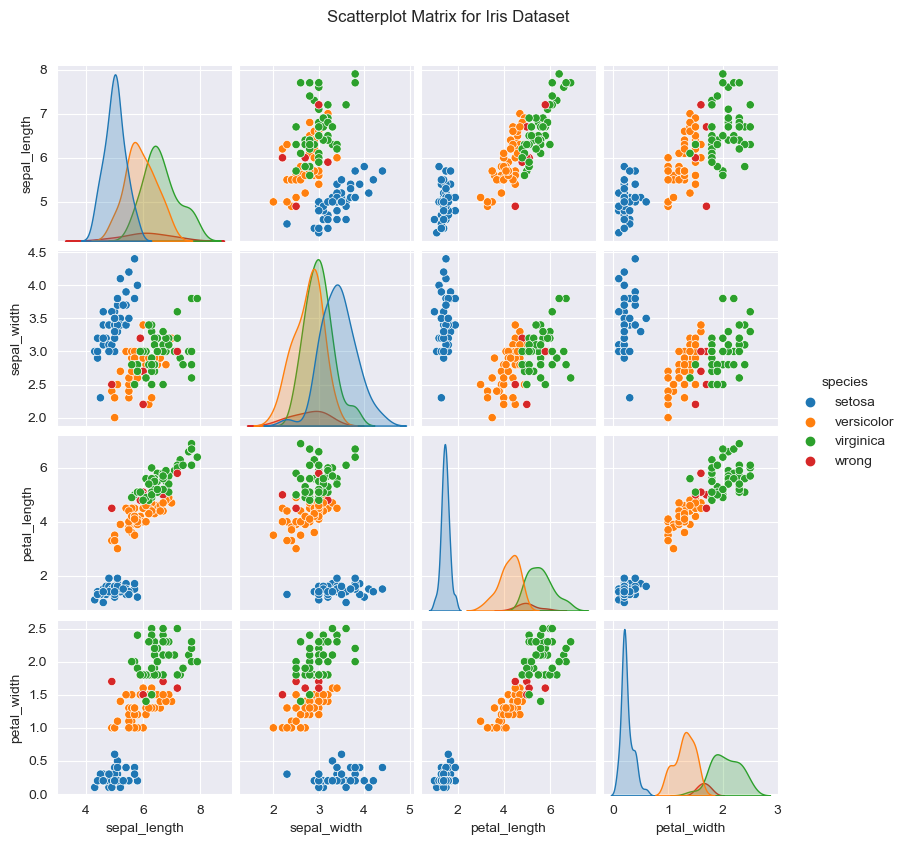

In [1798]:
df_iris_fold = df_iris.copy(deep=True)
df_iris_fold["species"] = \
    df_iris_fold["species"].cat.set_categories(["setosa", "versicolor", "virginica", "wrong"])
df_iris_fold.loc[misclassified.index, "species"] = "wrong"

sns.pairplot(df_iris_fold, hue='species', height=2, aspect=1)
plt.suptitle("Scatterplot Matrix for Iris Dataset", y=1.05)
plt.show()

**34)** [P] As you would expect, the scikit-learn framework has some powerful methods that can run an entire cross validation and report whatever metrics you want. Read about the cross_validate method, then use it to run a 10-fold cross validation on a default decision tree, reporting back 'accuracy' and 'f1_macro' measurements on both the training and testing data. Report your results as a single data frame.

In [1799]:
pd.DataFrame(cross_validate(clf, X, y, cv=10,
                            scoring=['accuracy', 'f1_macro'],
                            return_train_score=True))

fit_time  score_time  test_accuracy  train_accuracy  test_f1_macro  \
0  0.005024    0.004982       1.000000        0.970370       1.000000   
1  0.005001    0.004001       0.933333        0.977778       0.932660   
2  0.006001    0.004001       1.000000        0.970370       1.000000   
3  0.005001    0.004002       1.000000        0.970370       1.000000   
4  0.005001    0.004001       0.933333        0.977778       0.932660   
5  0.005001    0.004001       0.866667        0.970370       0.866667   
6  0.005001    0.004001       0.866667        0.970370       0.861111   
7  0.004001    0.004001       1.000000        0.970370       1.000000   
8  0.005001    0.004001       1.000000        0.970370       1.000000   
9  0.004993    0.004001       1.000000        0.970370       1.000000   

   train_f1_macro  
0        0.970356  
1        0.977753  
2        0.970356  
3        0.970356  
4        0.977775  
5        0.970356  
6        0.970356  
7        0.970356  
8        0.970356  
9        0.970356

**35)** [M] On the above, what are the variables fit_time and score_time?

From https://scikit-learn.org/0.21/modules/generated/sklearn.model_selection.cross_validate.html#:~:text=fit_time,set%20for%20each%20cv%20split.

fit_time: The time for fitting the estimator on the train set for each cv split.
score_time: The time for scoring the estimator on the test set for each cv split.

**36)** [P] OK, one last function for validation purposes. Read about the function cross_val_predict. This is perhaps among the most powerful of the model selection functions provided by sklearn, as it pretty much does everything we need in one function call. And, the predictions are returned! You can then use these predictions to run a classification_report and report confusion matrices. Use the cross_val_predict function to run a 10-fold cross validation with a default decision tree, and print the classification_report on your results.

In [1800]:
print(classification_report(y, cross_val_predict(clf, X, y, cv=10)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.96      0.94        50
   virginica       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



**37)** For your last task, you will perform model comparison tasks. Use the cross_val_predict method to compare the predictive performance on the following models:

a. A default decision tree
b. A decision tree with "entropy" for measuring impurity
c. A KNeighborsClassifier with a two different values of k (.)
d. MultinomialNB classifier (sklearn's Naïve Bayes implementation)

Compare and contrast the performance results between the different models. Which one would you choose?

In [1801]:
# a
clf = DecisionTreeClassifier()
print(classification_report(y, cross_val_predict(clf, X, y, cv=10)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.94      0.93        50
   virginica       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [1802]:
# b
clf = DecisionTreeClassifier(criterion="entropy")
print(classification_report(y, cross_val_predict(clf, X, y, cv=10)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.94      0.94        50
   virginica       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [1803]:
# c
clf = KNeighborsClassifier(n_neighbors=5)
print(classification_report(y, cross_val_predict(clf, X, y.species, cv=10)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.92      0.95        50
   virginica       0.92      0.98      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [1804]:
clf = KNeighborsClassifier(n_neighbors=10)
print(classification_report(y, cross_val_predict(clf, X, y.species, cv=10)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.96      0.95        50
   virginica       0.96      0.94      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [1805]:
# d
clf = MultinomialNB()
print(classification_report(y, cross_val_predict(clf, X, y.species, cv=10)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.92      0.93        50
   virginica       0.92      0.94      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



I would choose the KNeighborClassifier since it has a higher overall accuracy, and both k=5 and k=10 prove to have higher accuracies and f1-scores than the rest of the classifiers.